In [3]:
import numpy as np
import matplotlib.pyplot as plt

заданные условия

In [4]:
def phi0(t):
    return np.exp(-t)*np.cos(2*t)
def phi1(t):
    return 0
def psi1(x):
    return np.exp(-x)*np.cos(x)
def psi2(x):
    return -np.exp(-x) * np.cos(x)
def solution(x, t):
    return np.exp(-t-x)*np.cos(x)*np.cos(2*t)

def ddpsi1(x):
    return -np.exp(-x) * np.sin(x) - np.exp(-x) * np.cos(x)
def dpsi1(x):
    return 2 * np.exp(-x) * np.sin(x)

In [5]:
N = 10
K = 50
T = 1
l = np.pi / 2
h = l/N
tau = T/K
sigma = tau**2/(h ** 2)
x = np.linspace(0,l,N)
t = np.linspace(0,T,K)
Xp, Tp = np.meshgrid(x, t)

print(sigma)
print(h)

0.016211389382774045
0.15707963267948966


точное решение

In [6]:
def analitic(x,t):
    u = [0]*K
    for i in range(K):
        u[i] = [0]*N
    for i in range(K):
        for j in range(N):
            u[i][j] = solution(x[j], t[i])
    return u

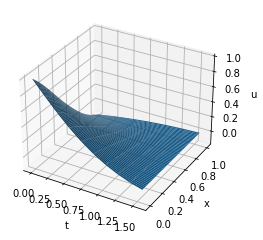

In [7]:
u = analitic(x,t)
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')
ax.plot_surface(Xp,Tp,np.array(u))
plt.show()

In [8]:
def explicit_solve(l, N, K, T, app):
    u = [0]*K
    for i in range(K):
        u[i] = [0]*N
    for k in range(K):
        u[k][0] = phi0(tau * k)
        u[k][-1] = phi1(tau * k)
    for j in range(N):
        u[0][j] = psi1(j * h)
        if app == 1:
            u[1][j] = psi1(j * h) + tau * psi2(j * h)
        if app == 2:
            u[1][j] = psi1(j * h) + tau * psi2(j * h) + tau**2*(ddpsi1(j*h)+2*dpsi1(j*h)-3*psi1(j*h))/2
    for k in range(2, K):
        for j in range(1, N - 1):
            u[k][j] = ((-3*tau**2-2*tau**2/h**2+2+2*tau)*u[k-1][j]+(tau**2/h**2+tau**2/h)*u[k-1][j+1]+(tau**2/h**2-tau**2/h)*u[k-1][j-1]-u[k-2][j])/(1+2*tau)
#     for k in range(K):
#         u[k][-1] = phi1(tau * k) 
    return(u)

Аппроксимация второго начального условия с первым порядком

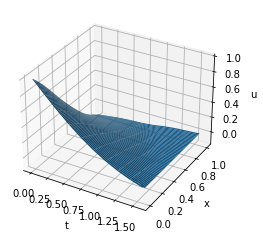

In [9]:
exp1 = explicit_solve(l, N, K, T, 1)
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')
ax.plot_surface(Xp, Tp, np.array(exp1))
plt.show()

Аппроксимация второго начального условия со вторым порядком

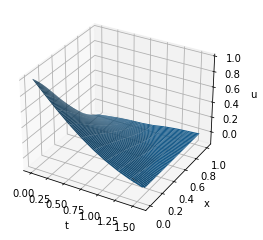

In [10]:
exp2 = explicit_solve(l, N, K, T, 2)
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')
ax.plot_surface(Xp, Tp, np.array(exp2))
plt.show()

неявная схема

In [11]:
def tma(a, b, c, d):
    n = len(a)
    p, q = [], []
    p.append(-c[0] / b[0])
    q.append(d[0] / b[0])
    for i in range(1, n):
        p.append(-c[i] / (b[i] + a[i] * p[i - 1]))
        q.append((d[i] - a[i] * q[i - 1]) / (b[i] + a[i] * p[i - 1]))
    x = [0 for _ in range(n)]
    x[n - 1] = q[n - 1]
    for i in range(n-2, -1, -1):
        x[i] = p[i] * x[i+1] + q[i]
    return x

In [12]:
def implicit_solve():
    a = np.zeros(N)
    b = np.zeros(N)
    c = np.zeros(N)
    d = np.zeros(N)
    u = [0]*K
    for i in range(K):
        u[i] = [0]*N
    for j in range(N):
        u[0][j] = psi1(j * h)
        u[1][j] = psi1(j * h) + tau * psi2(j * h)
    for k in range(2, K):
        for j in range(1, N-1):
            a[j] = 2 - h * 2
            b[j] = 2 * (h ** 2) * (-2 / (2 * tau) - 1 / (tau ** 2) - 3) - 4
            c[j] = h * 2 + 2
            #d[j] = -2*u[k-1][j]+u[k-2][j]
            d[j] = -4*(h**2)*u[k - 1][j] / (tau ** 2) + (2 * (h ** 2) / (tau ** 2) - 2 * (h ** 2) / tau) * u[k - 2][j]
        a[0] = 0
        b[0] = h
        c[0] = 0
        d[0] = phi0((k)*tau)*h
        a[-1] = 0
        b[-1] = h
        c[-1] = 0
        d[-1] = phi1(tau*(k))*h
#     for k in range(2, K):
        
        
        u[k] = tma(a, b, c, d)
    return u

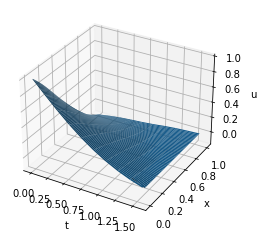

In [13]:
imp = implicit_solve()
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')
#ax.plot_surface(Xp, Tp, np.array(u))
ax.plot_surface(Xp, Tp, np.array(imp))
plt.show()

In [16]:
def pogr(res):
    return np.sqrt(sum([sum([(u[i][j]-res[i][j])**2 for j in range(len(x))]) for i in range(len(t))]))

In [17]:
pogr(exp1)

0.5272028672614416

In [18]:
pogr(exp2)

0.5135453802385277

In [19]:
pogr(imp)

0.5371863521392726